In [1]:
TRAIN_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_ejection_fraction_train_labels.csv"
VAL_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_ejection_fraction_val_labels.csv"
TEST_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_ejection_fraction_test_labels.csv"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


train_lvef = pd.read_csv(TRAIN_LABELS, header=None)
val_lvef = pd.read_csv(VAL_LABELS, header=None)
test_lvef = pd.read_csv(TEST_LABELS, header=None)

TRAIN_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_end_diastolic_train_labels.csv"
VAL_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_end_diastolic_val_labels.csv"
TEST_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_end_diastolic_test_labels.csv"

train_edv = pd.read_csv(TRAIN_LABELS)
val_edv = pd.read_csv(VAL_LABELS)
test_edv = pd.read_csv(TEST_LABELS)

TRAIN_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_end_systolic_train_labels.csv"
VAL_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_end_systolic_val_labels.csv"
TEST_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_end_systolic_test_labels.csv"

train_esv = pd.read_csv(TRAIN_LABELS)
val_esv = pd.read_csv(VAL_LABELS)
test_esv = pd.read_csv(TEST_LABELS)

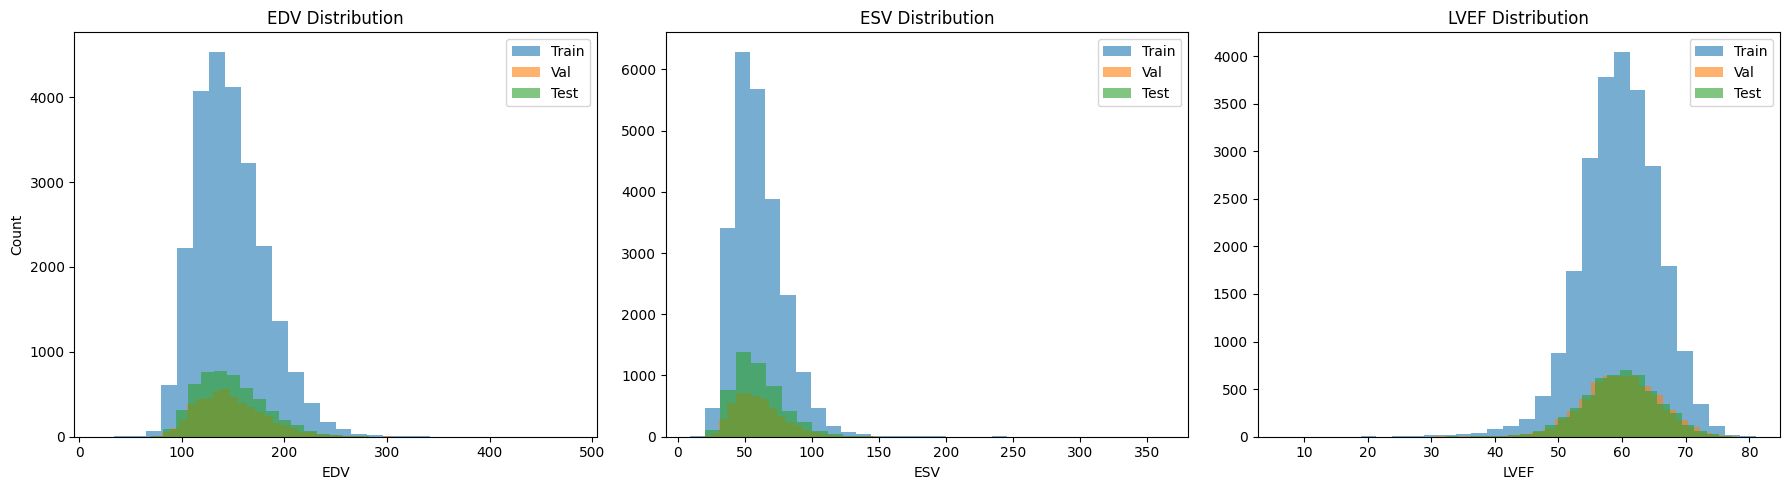

In [3]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# EDV
axs[0].hist(train_edv, bins=30, alpha=0.6, label="Train")
axs[0].hist(val_edv, bins=30, alpha=0.6, label="Val")
axs[0].hist(test_edv, bins=30, alpha=0.6, label="Test")
axs[0].set_title("EDV Distribution")
axs[0].set_xlabel("EDV")
axs[0].set_ylabel("Count")
axs[0].legend()

# ESV
axs[1].hist(train_esv, bins=30, alpha=0.6, label="Train")
axs[1].hist(val_esv, bins=30, alpha=0.6, label="Val")
axs[1].hist(test_esv, bins=30, alpha=0.6, label="Test")
axs[1].set_title("ESV Distribution")
axs[1].set_xlabel("ESV")
axs[1].legend()

# LVEF
axs[2].hist(train_lvef, bins=30, alpha=0.6, label="Train")
axs[2].hist(val_lvef, bins=30, alpha=0.6, label="Val")
axs[2].hist(test_lvef, bins=30, alpha=0.6, label="Test")
axs[2].set_title("LVEF Distribution")
axs[2].set_xlabel("LVEF")
axs[2].legend()

plt.tight_layout()
plt.show()

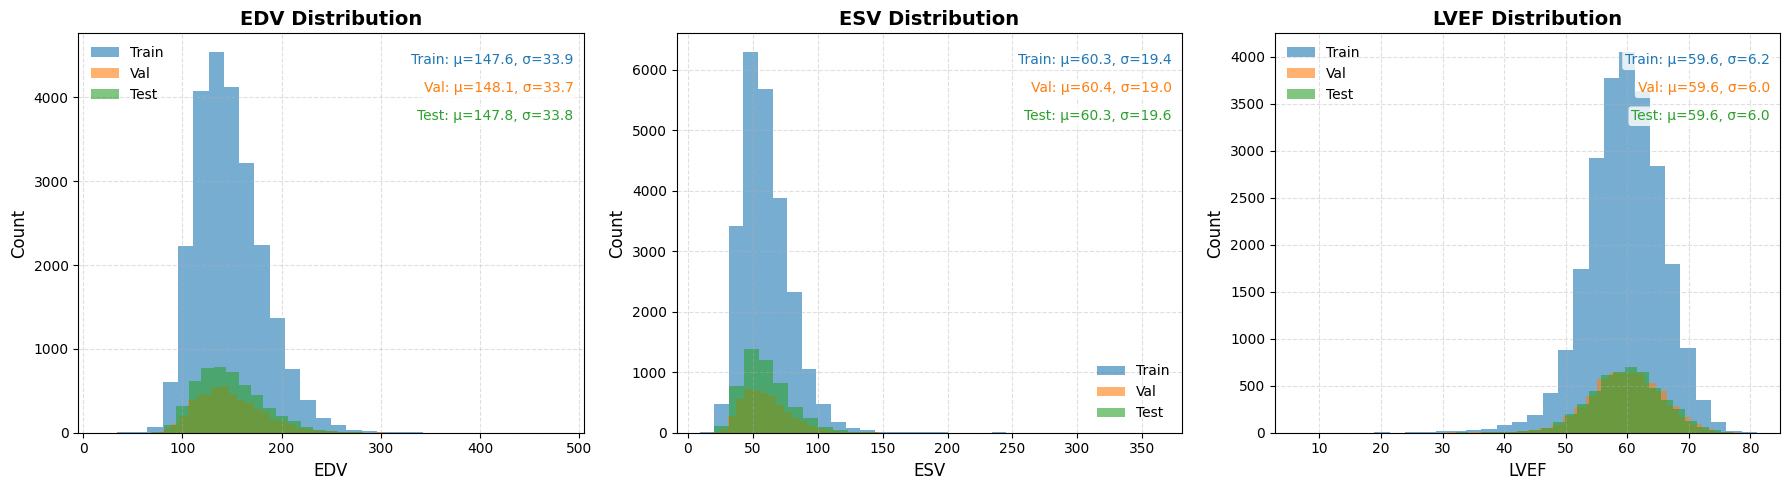

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Colors for consistency
colors = {
    "Train": "#1f77b4",  # blue
    "Val": "#ff7f0e",    # orange
    "Test": "#2ca02c"    # green
}

def add_stats(ax, data, label, color, ypos=0.95):
    """Add mean ± std text annotation inside the plot."""
    mean = np.mean(data).item()
    std = np.std(data).item()
    ax.text(
        0.98, ypos, f"{label}: μ={mean:.1f}, σ={std:.1f}",
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=10, color=color,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
    )

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot histograms and add stats
for ax, (train_data, val_data, test_data, title, xlabel) in zip(
    axs,
    [
        (train_edv, val_edv, test_edv, "EDV Distribution", "EDV"),
        (train_esv, val_esv, test_esv, "ESV Distribution", "ESV"),
        (train_lvef, val_lvef, test_lvef, "LVEF Distribution", "LVEF"),
    ]
):
    ax.hist(train_data, bins=30, alpha=0.6, label="Train", color=colors["Train"])
    ax.hist(val_data, bins=30, alpha=0.6, label="Val", color=colors["Val"])
    ax.hist(test_data, bins=30, alpha=0.6, label="Test", color=colors["Test"])

    add_stats(ax, train_data, "Train", colors["Train"], ypos=0.95)
    add_stats(ax, val_data, "Val", colors["Val"], ypos=0.88)
    add_stats(ax, test_data, "Test", colors["Test"], ypos=0.81)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(labelsize=10)
    ax.legend(frameon=False, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


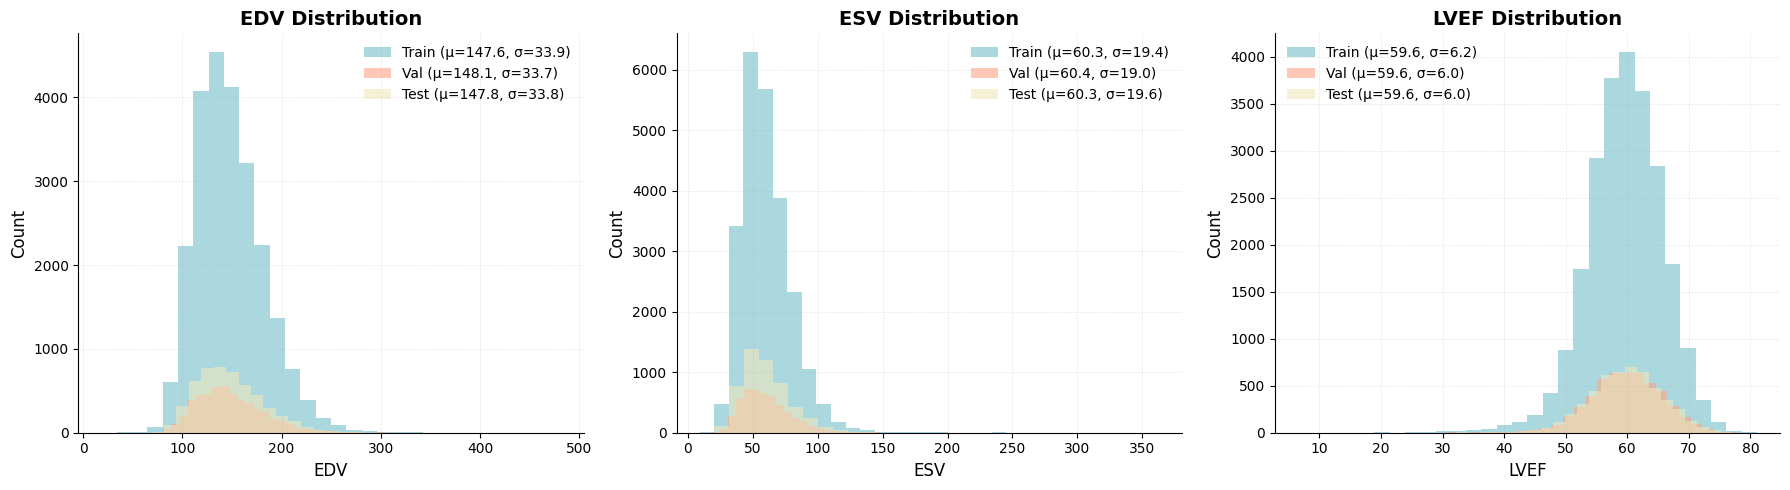

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Custom professional color palette (muted tones)
colors = {
    "Train": "#74bdcb",  # muted teal
    "Val": "#ffa384",    # soft ochre
    "Test": "#efe7bc"    # slate blue
}

def get_stats_text(data):
    """Return μ ± σ text for the legend."""
    mean = np.mean(data).item()
    std = np.std(data).item()
    return f"μ={mean:.1f}, σ={std:.1f}"

def clean_axes(ax):
    """Style axes to remove top/right spines and lighten grid."""
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.3)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for ax, (train_data, val_data, test_data, title, xlabel) in zip(
    axs,
    [
        (train_edv, val_edv, test_edv, "EDV Distribution", "EDV"),
        (train_esv, val_esv, test_esv, "ESV Distribution", "ESV"),
        (train_lvef, val_lvef, test_lvef, "LVEF Distribution", "LVEF"),
    ]
):
    # Histograms
    ax.hist(train_data, bins=30, alpha=0.6, label=f"Train ({get_stats_text(train_data)})", color=colors["Train"])
    ax.hist(val_data, bins=30, alpha=0.6, label=f"Val ({get_stats_text(val_data)})", color=colors["Val"])
    ax.hist(test_data, bins=30, alpha=0.6, label=f"Test ({get_stats_text(test_data)})", color=colors["Test"])

    # Labels and titles
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(labelsize=10)

    # Styling
    clean_axes(ax)
    ax.legend(frameon=False, fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
train_lvef = pd.read_csv(TRAIN_LABELS)
val_lvef = pd.read_csv(VAL_LABELS)
test_lvef = pd.read_csv(TEST_LABELS)

In [11]:
train_lvef.head()

train_lvef["binary_lvef"] = 0
train_lvef.loc[train_lvef[0] > 45, "binary_lvef"] = 1

In [ ]:
val_lvef["binary_lvef"] = 0
val_lvef.loc[val_lvef[0] > 45, "binary_lvef"] = 1

val_lvef.head()

,0,binary_lvef
0,76.5656,1
1,51.0994,1
2,50.2984,1
3,48.1939,1
4,39.8849,0


In [16]:
test_lvef["binary_lvef"] = 0
test_lvef.loc[test_lvef[0] > 45, "binary_lvef"] = 1

test_lvef.head(10)

,0,binary_lvef
0,53.7472,1
1,52.9685,1
2,78.4681,1
3,78.0342,1
4,49.0968,1
5,84.5012,1
6,38.7501,0
7,44.9266,0
8,46.9273,1
9,61.0091,1


In [17]:
TRAIN_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_ejection_fraction_train_labels_binary.csv"
VAL_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_ejection_fraction_val_labels_binary.csv"
TEST_LABELS="/projects/prjs1252/CL_data/ECG_data/normalized/ECG_balanced_LV_ejection_fraction_test_labels_binary.csv"

In [19]:
train_lvef["binary_lvef"].to_csv(TRAIN_LABELS, header=False, index=False)
val_lvef["binary_lvef"].to_csv(VAL_LABELS, header=False, index=False)
test_lvef["binary_lvef"].to_csv(TEST_LABELS, header=False, index=False)

In [24]:
val_lvef_b = pd.read_csv(VAL_LABELS, header=None)

val_lvef.head(10)

,0,binary_lvef
0,76.5656,1
1,51.0994,1
2,50.2984,1
3,48.1939,1
4,39.8849,0
5,62.6423,1
6,52.2342,1
7,40.0184,0
8,93.4875,1
9,59.9464,1


In [27]:
val_lvef_b.head(10)

,0
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,1
9,1
